# Football data

In [5]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("database.sqlite")
cur = conn.cursor()

### Observation

We'll process several queries in order to understand how the data is formatted

In [71]:
# Match query
cur.execute("select * from Match where home_player_1 is not null limit 2;")
results = cur.fetchall()
print(results)

[(145, 1, 1, '2008/2009', 24, '2009-02-28 00:00:00', 493016, 9996, 8635, 1, 1, 1, 2, 4, 6, 8, 2, 4, 6, 8, 4, 6, 1, 2, 4, 6, 8, 2, 4, 6, 8, 4, 6, 1, 3, 3, 3, 3, 7, 7, 7, 7, 10, 10, 1, 3, 3, 3, 3, 7, 7, 7, 7, 10, 10, 39890, None, 38788, 38312, 26235, None, None, None, 26916, None, 94289, 34480, 38388, 26458, 13423, 38389, 38798, 30949, 38253, 106013, 38383, 46552, None, None, None, None, None, None, None, None, 5.75, 3.75, 1.55, 5.5, 3.65, 1.55, 4.8, 3.5, 1.55, 5, 3.5, 1.57, None, None, None, 4.8, 3.4, 1.62, 5.5, 3.5, 1.62, 5, 3.4, 1.6, 5.25, 3.6, 1.6, 5.5, 3.6, 1.53), (146, 1, 1, '2008/2009', 24, '2009-02-27 00:00:00', 493017, 8203, 9987, 2, 1, 1, 2, 4, 6, 8, 2, 4, 6, 8, 4, 6, 1, 2, 4, 6, 8, 2, 4, 6, 8, 4, 6, 1, 3, 3, 3, 3, 7, 7, 7, 7, 10, 10, 1, 3, 3, 3, 3, 7, 7, 7, 7, 10, 10, 38327, 67950, 67958, 67959, 37112, 36393, 148286, 67898, 164352, 38801, 26502, 37937, 38293, 148313, 104411, 148314, 37202, 43158, 9307, 42153, 32690, 38782, None, None, None, None, None, None, None, None, 3, 3.4

In [72]:
# Player query
cur.execute("select * from Player limit 5;")
results = cur.fetchall()
print(results)

[(1, 505942, 'Aaron Appindangoye', 218353, '1992-02-29 00:00:00', 182.88, 187), (2, 155782, 'Aaron Cresswell', 189615, '1989-12-15 00:00:00', 170.18, 146), (3, 162549, 'Aaron Doran', 186170, '1991-05-13 00:00:00', 170.18, 163), (4, 30572, 'Aaron Galindo', 140161, '1982-05-08 00:00:00', 182.88, 198), (5, 23780, 'Aaron Hughes', 17725, '1979-11-08 00:00:00', 182.88, 154)]


In [73]:
# Player attributes query
# Player with player_api_id 75489 is Aaron Ramsey
cur.execute("select * from Player_Attributes where player_api_id = 75489 limit 5;")
results = cur.fetchall()
print(results)

[(270, 186561, 75489, '2016-03-10 00:00:00', 82, 85, 'right', 'high', 'high', 75, 75, 58, 83, 79, 81, 70, 70, 80, 82, 69, 69, 77, 82, 75, 81, 65, 92, 69, 75, 74, 69, 83, 81, 75, 62, 74, 68, 6, 11, 5, 10, 8), (271, 186561, 75489, '2016-03-03 00:00:00', 82, 85, 'right', 'high', 'high', 75, 75, 58, 83, 79, 81, 70, 70, 80, 82, 71, 69, 77, 82, 75, 81, 65, 92, 69, 75, 74, 69, 83, 81, 75, 62, 74, 68, 6, 11, 5, 10, 8), (272, 186561, 75489, '2016-02-18 00:00:00', 82, 85, 'right', 'high', 'high', 75, 75, 58, 83, 79, 81, 70, 70, 81, 82, 71, 69, 77, 82, 75, 81, 65, 92, 69, 77, 74, 69, 83, 81, 75, 62, 74, 68, 6, 11, 5, 10, 8), (273, 186561, 75489, '2016-01-28 00:00:00', 82, 85, 'right', 'high', 'high', 75, 75, 58, 83, 79, 81, 70, 70, 81, 82, 71, 69, 77, 82, 75, 81, 65, 92, 69, 77, 74, 69, 83, 81, 75, 62, 74, 68, 6, 11, 5, 10, 8), (274, 186561, 75489, '2015-09-21 00:00:00', 82, 86, 'right', 'high', 'high', 74, 75, 58, 84, 81, 81, 64, 70, 82, 82, 71, 68, 74, 81, 75, 81, 63, 93, 69, 78, 75, 67, 84, 81

In [74]:
# Count number of games with player ids not null
query = "select count(id) from Match where "
for i in range(1, 12):
    query += "home_player_" + str(i) + " is not null and "
for i in range(1, 11):
    query += "away_player_" + str(i) + " is not null and "
query += "away_player_11 is not null "
result = pd.read_sql_query(query, conn)
print(result)

   count(id)
0      21374


### Data processing

We'll make multiple SQL queries in order to get a clean Pandas dataframe

In [138]:
NUMBER_MATCHS = 1000

def build_query_match(number_matchs):
    query = "select home_team_goal, away_team_goal, date, "
    for i in range(1,12):
        query += "home_player_" + str(i) + ", "
    for i in range(1, 11):
        query += "away_player_" + str(i) + ", "
    query += "away_player_11"
    query += " from Match where "
    for i in range(1, 12):
        query += "home_player_" + str(i) + " is not null and "
    for i in range(1, 11):
        query += "away_player_" + str(i) + " is not null and "
    query += "away_player_11 is not null "
    query += "limit " + str(number_matchs) + ";"
    return query

query = build_query_match(NUMBER_MATCHS)

matchs = pd.read_sql_query(query, conn)

In [139]:
def build_query_date(match):
    query_date_attr = "select distinct date from Player_Attributes where ("
    for i in range(1, 12):
        query_date_attr += "player_api_id = " + str(match['home_player_' + str(i)]) + " or "
    query_date_attr += "player_api_id = " + str(match['home_player_11']) + ")"
    return query_date_attr

def get_closest_date(match, dates):
    date_format = "%Y-%m-%d %H:%M:%S"
    match_date = datetime.strptime(str(match['date']), date_format)
    closest_date = datetime(2000, 1, 1, 1, 1)
    min_diff = timedelta(days = 9999)
    for j, attr_d in dates.iterrows():
        attr_date = datetime.strptime(str(attr_d['date']), date_format)
        diff = abs(match_date - attr_date)
        if (diff < min_diff):
            closest_date = attr_d['date']
            min_diff = diff
    return closest_date

def build_query_player(match, team):
    query_player = "select height, weight from Player where "
    for i in range(1, 12):
        query_player += "player_api_id = " + str(match[team + '_player_' + str(i)]) + " or "
    query_player += "player_api_id = " + str(match[team + '_player_11'])
    return query_player

def build_query_attrs(match, team, closest_date):
    query_player_attr = "select overall_rating, potential, crossing, finishing, preferred_foot, sprint_speed, positioning from Player_Attributes where ("
    for i in range(1, 12):
        query_player_attr += "player_api_id = " + str(match[team + '_player_' + str(i)]) + " or "
    query_player_attr += "player_api_id = " + str(match[team + '_player_11']) + ")"
    query_player_attr += " and date = \"" + str(closest_date) + "\""
    return query_player_attr

def get_statistics(match_df, values, keys, team):
    for key in keys:
        val_avg = values[key].mean()
        key_df = team + "_" + key
        match_df[key_df] = val_avg
    return match_df

GOAL_DIFFERENCE = 4
def goal_difference(match):
    difference = match["home_team_goal"] - match["away_team_goal"]
    if difference > GOAL_DIFFERENCE:
        difference = GOAL_DIFFERENCE
    elif difference < -GOAL_DIFFERENCE:
        difference = -GOAL_DIFFERENCE
    return difference

# For the beginning, we'll get only average
def get_relevant_statistics(data):
    return data.mean()

In [140]:
from datetime import datetime, timedelta

match_and_players_arr = []

# TODO : Make something special for the goalkeeper

for index, match in matchs.iterrows():
    match_df = pd.DataFrame.from_dict([match])
    match_df = match_df[['home_team_goal', 'away_team_goal']]
    difference = goal_difference(match)
    match_df["goal_difference"] = difference
    match_df = match_df.drop(['home_team_goal', 'away_team_goal'], axis=1)
    
    # Get the dates in the attributes table
    query_date = build_query_date(match)
    date_attr = pd.read_sql_query(query_date, conn)
    
    # Find the closest date for attributes
    closest_date = get_closest_date(match, date_attr)
    
    # Get the home players
    query_home_player = build_query_player(match, "home")
    home_players = pd.read_sql_query(query_home_player, conn)
    
    # Get the away players
    query_away_player = build_query_player(match, "away")
    away_players = pd.read_sql_query(query_away_player, conn)
    
    # Get the attributes of home players
    query_home_player_attr = build_query_attrs(match, "home", closest_date)
    home_players_attr = pd.read_sql_query(query_home_player_attr, conn)
    
    # Get the attributes of away players
    query_away_player_attr = build_query_attrs(match, "away", closest_date)
    away_players_attr = pd.read_sql_query(query_away_player_attr, conn)
    
    # Percentage left_foot
    
    # Get average of overall_rating, higher, lowest
    avg_attrs = ['overall_rating', 'potential', 'crossing', 'finishing', 'sprint_speed']
    match_df = get_statistics(match_df, home_players_attr, avg_attrs, "home")
    match_df = get_statistics(match_df, away_players_attr, avg_attrs, "away")
    
    avg_players = ['height', 'weight']
    match_df = get_statistics(match_df, home_players, avg_players, "home")
    match_df = get_statistics(match_df, away_players, avg_players, "away")
    
    match_and_players_arr.append(match_df)
    
matchs_data = pd.concat(match_and_players_arr)

matchs_data = (matchs_data - matchs_data.mean()) / (matchs_data.max() - matchs_data.min())
matchs_data = matchs_data.fillna(0)

print(matchs_data.head())


   goal_difference  home_overall_rating  home_potential  home_crossing  \
0          0.07525            -0.433612       -0.151656      -0.056705   
1         -0.29975            -0.087779       -0.037863       0.108399   
2          0.20025             0.239602        0.137014       0.000884   
3          0.07525            -0.389862       -0.135564      -0.045247   
4         -0.04975            -0.316946       -0.116407      -0.074761   

   home_finishing  home_sprint_speed  away_overall_rating  away_potential  \
0       -0.022697           0.026953             0.008433       -0.010754   
1        0.158329           0.004225             0.125100        0.151368   
2        0.019501           0.016130            -0.393650       -0.121360   
3        0.024995           0.021902             0.221975        0.184322   
4       -0.064748          -0.026919            -0.391865       -0.188243   

   away_crossing  away_finishing  away_sprint_speed  home_height  home_weight  \
0       0.0

In [146]:
# We save the dataframe as a csv for a faster load next time
matchs_data.to_csv("matchs.csv", index=False)

In [141]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(matchs_data, test_size=0.2)

train_data = train.drop(['goal_difference'], axis=1)
train_labels = train['goal_difference']

test_data = test.drop(['goal_difference'], axis=1)
test_labels = test['goal_difference']

### Training

For the first try, we'll use a simple model with two layers

In [142]:
import tensorflow as tf
from tensorflow import keras

def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                960       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 5,185
Trainable params: 5,185
Non-trainable params: 0
_________________________________________________________________


In [143]:
EPOCHS = 20

# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2)

Train on 640 samples, validate on 160 samples
Epoch 1/20
640/640 [==============================] - 0s 729us/step - loss: 0.0441 - mean_absolute_error: 0.1684 - val_loss: 0.0474 - val_mean_absolute_error: 0.1735
Epoch 2/20
640/640 [==============================] - 0s 90us/step - loss: 0.0439 - mean_absolute_error: 0.1679 - val_loss: 0.0471 - val_mean_absolute_error: 0.1728
Epoch 3/20
640/640 [==============================] - 0s 87us/step - loss: 0.0435 - mean_absolute_error: 0.1666 - val_loss: 0.0464 - val_mean_absolute_error: 0.1716
Epoch 4/20
640/640 [==============================] - 0s 145us/step - loss: 0.0427 - mean_absolute_error: 0.1647 - val_loss: 0.0450 - val_mean_absolute_error: 0.1691
Epoch 5/20
640/640 [==============================] - 0s 102us/step - loss: 0.0411 - mean_absolute_error: 0.1611 - val_loss: 0.0430 - val_mean_absolute_error: 0.1673
Epoch 6/20
640/640 [==============================] - 0s 107us/step - loss: 0.0395 - mean_absolute_error: 0.1587 - val_loss: 0

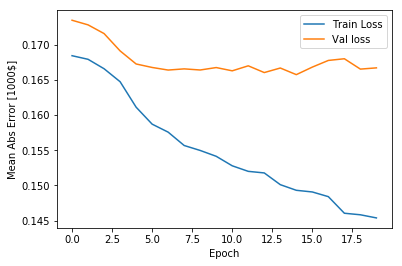

In [144]:
import matplotlib.pyplot as plt
import numpy as np


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()

plot_history(history)